In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from dataset import Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
DATA_DIR = os.path.abspath("adsp-data/494_bus")

In [3]:
d = Dataset(DATA_DIR)
X = d.df
X

,branch-instructions,branch-misses,bus-cycles,cache-misses,cache-references,cpu-cycles,instructions,ref-cycles,alignment-faults,bpf-output,...,xhci-hcd:xhci_ring_expansion,xhci-hcd:xhci_ring_free,xhci-hcd:xhci_ring_host_doorbell,xhci-hcd:xhci_setup_addressable_virt_device,xhci-hcd:xhci_setup_device,xhci-hcd:xhci_setup_device_slot,xhci-hcd:xhci_stop_device,xhci-hcd:xhci_urb_dequeue,xhci-hcd:xhci_urb_enqueue,xhci-hcd:xhci_urb_giveback
0.0_0.0,6736309.0,86059.0,522589.0,2390.0,18574.4,2.181206e+07,44237504.4,4.903561e+07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0_0.01,6736309.0,86059.0,522589.0,2390.0,18574.4,2.181206e+07,44237504.4,4.903561e+07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0_0.02,6736309.0,86059.0,522589.0,2390.0,18574.4,2.181206e+07,44237504.4,4.903561e+07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0_0.03,6736309.0,86059.0,522589.0,2390.0,18574.4,2.181206e+07,44237504.4,4.903561e+07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0_0.04,6736309.0,86059.0,522589.0,2390.0,18574.4,2.181206e+07,44237504.4,4.903561e+07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1_0.06,254973162.1,331981.2,140253059.4,977597.7,2756457.2,3.567877e+09,904625697.9,3.387958e+09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1_0.07,250030505.3,332512.6,138149341.2,986532.2,2751048.2,3.515370e+09,891091395.1,3.324557e+09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1_0.08,248160318.7,331901.0,138288832.9,980188.9,2744338.3,3.556181e+09,902253355.0,3.354357e+09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1_0.09,254244385.9,339564.2,141167339.1,974596.8,2732018.3,3.544586e+09,903918499.1,3.362510e+09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f"Loaded data keys: {list(d.df.columns)[:10]}")
print(f"DataFrame shape: {d.df.shape}")

Loaded data keys: ['branch-instructions', 'branch-misses', 'bus-cycles', 'cache-misses', 'cache-references', 'cpu-cycles', 'instructions', 'ref-cycles', 'alignment-faults', 'bpf-output']
DataFrame shape: (200, 2424)


In [5]:
# Save X to the Excel file
X.to_excel("dataframe_494_bus_with_index_3.xlsx", index=True)

In [32]:
# Load the Excel file
X = pd.read_excel("dataframe_494_bus_with_index.xlsx", index_col=0)


In [33]:
y = np.array([float(i.split("_")[0]) * 100 for i in X.index])
y_binary = np.where(y == 0, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.33, random_state=22)


scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [34]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred = model.predict(X_test_scaled)

MSE: 0.0303, MAE: 0.0303, Accuracy: 0.9697, Precision: 1.0000, Recall: 0.9375, F1: 0.9677


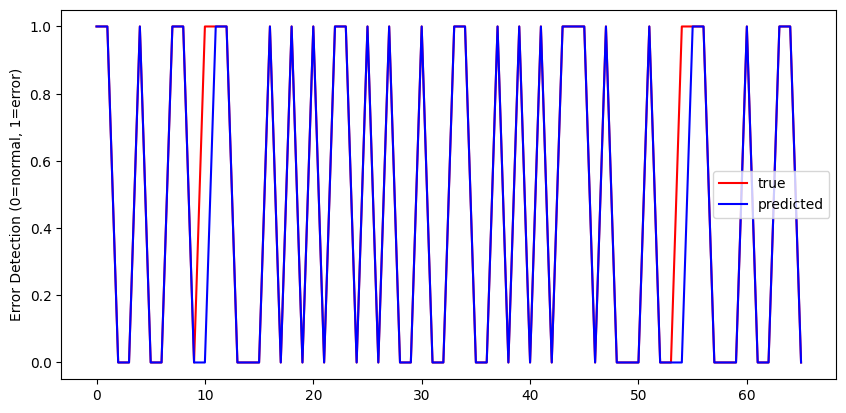

In [36]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, y_pred)
mse = mse_metric.result().numpy()

mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, y_pred)
mae = mae_metric.result().numpy()

acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

f = plt.figure()
plt.plot(range(len(y_test)), y_test, color="red", label="true")
plt.plot(range(len(y_pred)), y_pred, color="blue", label="predicted")
plt.ylabel("Error Detection (0=normal, 1=error)")
f.set_figwidth(10)
plt.legend()
plt.show()





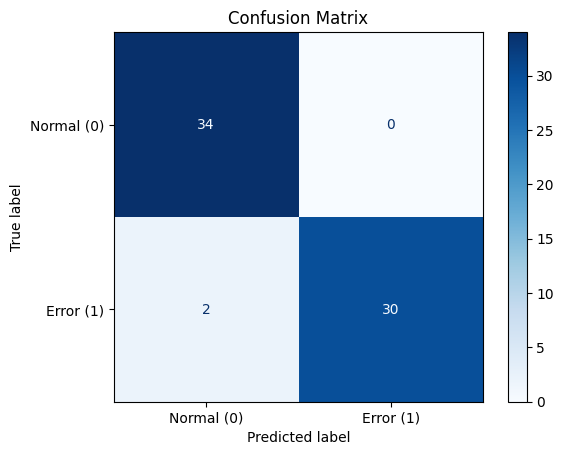

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal (0)", "Error (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()